In [1]:
%matplotlib inline

In [2]:
import torch

In [3]:
torch.cuda.current_device()

0

In [4]:
torch.cuda.device(0)

In [5]:
torch.cuda.device_count()

1

In [6]:
torch.cuda.get_device_name(0)

'Quadro P5000'

In [7]:
torch.cuda.is_available()

True

In [8]:
from fastai2.tabular.all import *

In [9]:
import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 200
mpl.rcParams['savefig.dpi']= 200
mpl.rcParams['font.size']=12
mpl.rcParams['figure.figsize'] = 8, 6
%config InlineBackend.figure_format='retina'

In [10]:
path = untar_data("https://storage.googleapis.com/sv-fastai/datasets/apthunt/apthuntdata.tgz",
          dest=".",
#           force_download=true
          )

In [11]:
path.ls()

(#1) [Path('apthuntdata/data.csv')]

In [12]:
df_nn = pd.read_csv(path/'data.csv', low_memory=False)

In [13]:
df_nn.describe()

,latitude,longitude,price,bedrooms,area,nthumbs
count,549668.000000,549668.000000,578270.000000,388879.000000,4.151590e+05,578270.000000
mean,37.685061,-122.156787,2942.898278,1.883794,1.103677e+03,10.890498
std,0.531836,1.308372,1321.872762,0.974896,2.284236e+04,6.326599
min,-37.850922,-177.626953,0.000000,1.000000,1.000000e+00,0.000000
25%,37.408072,-122.414617,2100.000000,1.000000,7.000000e+02,6.000000
50%,37.758900,-122.242900,2695.000000,2.000000,8.990000e+02,10.000000
75%,37.829719,-121.984400,3500.000000,2.000000,1.150000e+03,15.000000
max,83.539335,127.724400,9000.000000,123.000000,8.388607e+06,24.000000


In [14]:
df_nn.head()

,PostUrl,latitude,longitude,district,address,housing,price,bedrooms,area,type,catsok,dogsok,garagea,garaged,furnished,laundryb,laundrys,wd,nthumbs,price_bucket
0,https://sfbay.craigslist.org/sby/apa/d/sunset-oaks-townhome-1249/6709118961.html,37.353754,-122.026428,sunnyvale,1249 Crescent Terrace,2br - 1300ft2,3150.0,2.0,1300.0,townhouse,False,False,False,True,False,False,False,True,18,06x500
1,https://sfbay.craigslist.org/eby/apa/d/pittsburg-apartment-living/6720712945.html,38.008321,-121.864673,"Pittsburg, CA",2205 E Leland Rd,2br - 875ft2,1769.0,2.0,875.0,apartment,False,False,False,False,False,False,False,False,8,03x500
2,https://sfbay.craigslist.org/sfc/apa/d/2-bedroom-1-bath-1-car-garage/6712471985.html,37.710526,-122.439706,excelsior / outer mission,375 Pope Street,2br - 1800ft2,3000.0,2.0,1800.0,house,False,False,True,False,False,True,False,False,5,06x500
3,https://sfbay.craigslist.org/eby/apa/d/fairfield-updated-1200-sq-ft-3-bed-15/7097278416.html,38.274790,-122.019156,fairfield / vacaville,2436 Baltic Dr,3br - 1200ft2,2150.0,3.0,1200.0,house,False,False,False,True,False,False,False,False,10,04x500
4,https://sfbay.craigslist.org/eby/apa/d/hayward-fully-renovated-1bed-1bath-in/7112941389.html,37.671644,-122.076737,hayward / castro valley,1182 E Street near 2nd,1br - 726ft2,2150.0,1.0,726.0,apartment,True,True,False,False,False,False,False,True,8,04x500


In [15]:
dls = TabularDataLoaders.from_csv(path/'data.csv', 
                                  y_names="price_bucket",
                                  cat_names = ['housing', 
                                               'district', 
                                               'bedrooms', 
                                               'type', 
                                               'catsok', 
                                               'dogsok', 
                                               'garagea', 
                                               'garaged', 
                                               'furnished', 
                                               'laundryb', 
                                               'laundrys', 
                                               'wd',
                                               "nthumbs"
                                              ],
                                  cont_names = ['latitude', 'longitude', 'area'],
                                  procs = [Categorify, FillMissing, Normalize],
                                 bs=8192)

In [16]:
dls.show_batch()

,housing,district,bedrooms,type,catsok,dogsok,garagea,garaged,furnished,laundryb,laundrys,wd,nthumbs,latitude_na,longitude_na,area_na,latitude,longitude,area,price_bucket
0,3br - 1500ft2,cole valley / ashbury hts,3,apartment,False,False,False,False,True,True,False,False,12,False,False,False,37.766872,-122.449074,1499.999998,11x500
1,3br - 940ft2,oakland east,3,apartment,False,False,False,False,False,False,False,False,13,False,False,False,37.741928,-122.174324,939.999997,06x500
2,1br,castro / upper market,#na#,apartment,True,True,False,False,False,False,True,False,4,False,False,True,37.761250,-122.439224,897.499997,06x500
3,1br,oakland north / temescal,#na#,apartment,False,False,False,False,False,True,False,False,8,False,False,True,37.829830,-122.259018,897.499997,05x500
4,1br - 767ft2,sunnyvale,1,apartment,True,True,False,False,True,False,False,True,24,False,False,False,37.370163,-122.057442,767.000001,07x500
5,3br - 1809ft2,San Francisco's,3,apartment,True,True,True,False,True,False,False,True,23,False,False,False,37.759300,-122.483597,1809.000018,10x500
6,1br - 777ft2,walnut creek,1,apartment,True,True,False,False,False,False,False,True,13,False,False,False,37.929703,-122.053543,776.999993,05x500
7,380ft2,mission district,#na#,apartment,True,True,True,False,False,False,False,True,19,False,False,False,37.758835,-122.429031,379.999997,06x500
8,2br,santa clara,#na#,#na#,True,True,False,False,False,False,True,False,6,False,False,True,37.342739,-121.962372,897.499997,04x500
9,1br - 900ft2,oakland hills / mills,1,#na#,True,False,False,False,False,False,False,True,8,False,False,False,37.780601,-122.216599,900.000000,02x500


In [17]:
learn = tabular_learner(dls, metrics=accuracy,
                        layers=[500, 250, 100]
                       )

In [18]:
# learn.model    

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.002511886414140463)

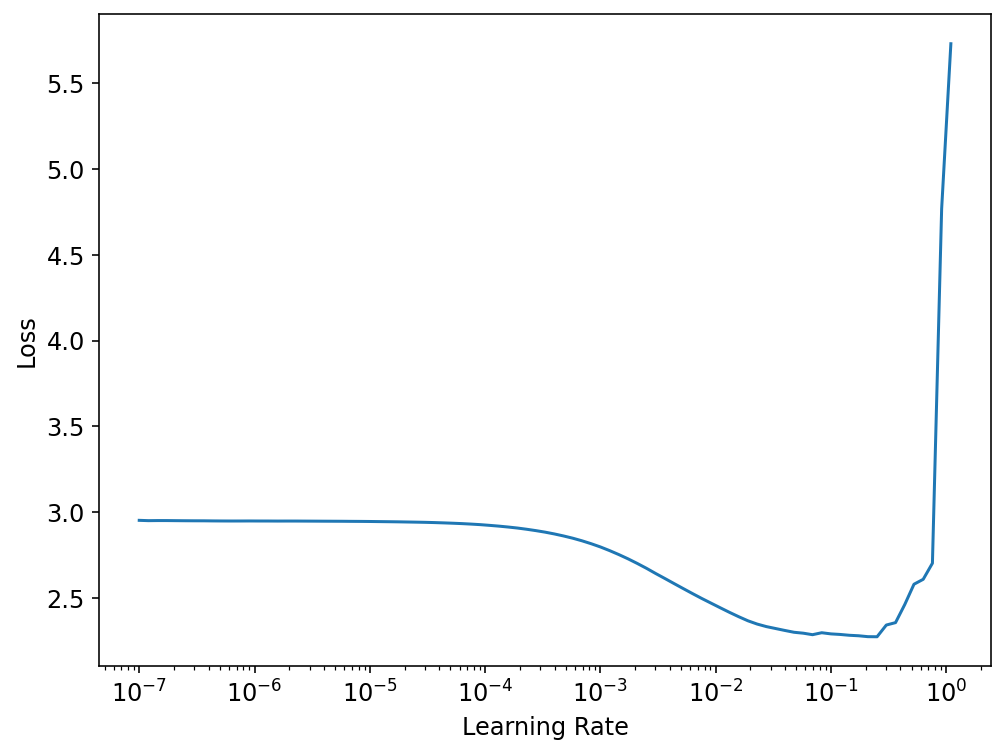

In [19]:
learn.lr_find()

In [20]:
learn.fit_one_cycle(7, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,1.567113,1.439859,0.498357,00:03
1,1.238509,1.116921,0.583075,00:03
2,1.067072,1.059533,0.607078,00:03
3,0.951514,1.025909,0.626844,00:03
4,0.851570,0.989594,0.647345,00:03
5,0.757302,0.986365,0.660833,00:03
6,0.681766,0.991604,0.664517,00:03


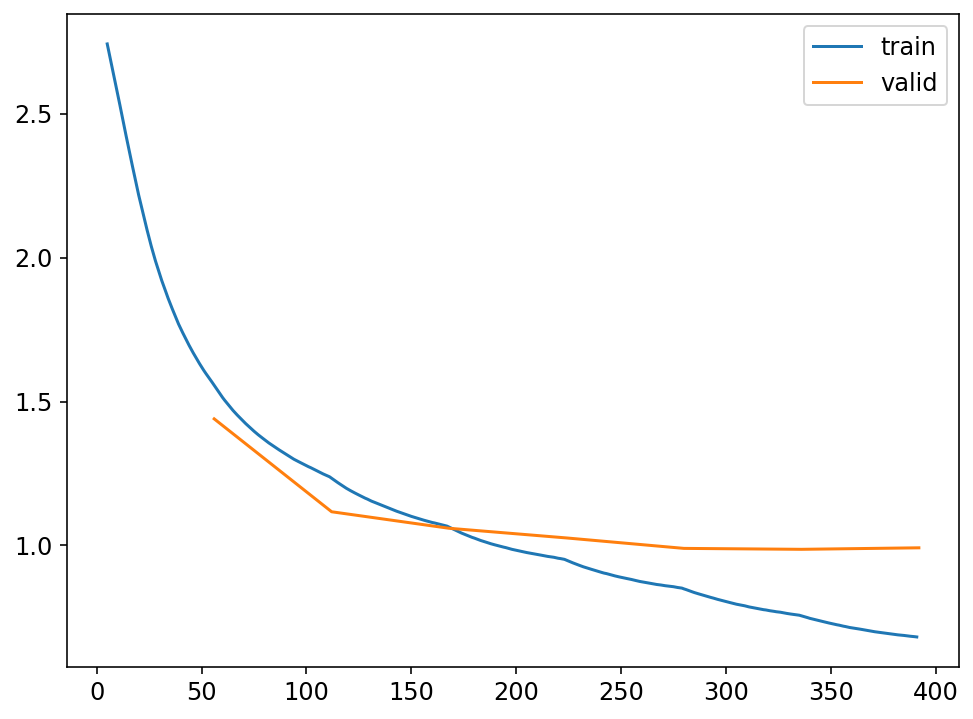

In [21]:
learn.recorder.plot_loss()

In [22]:
interp = ClassificationInterpretation.from_learner(learn)


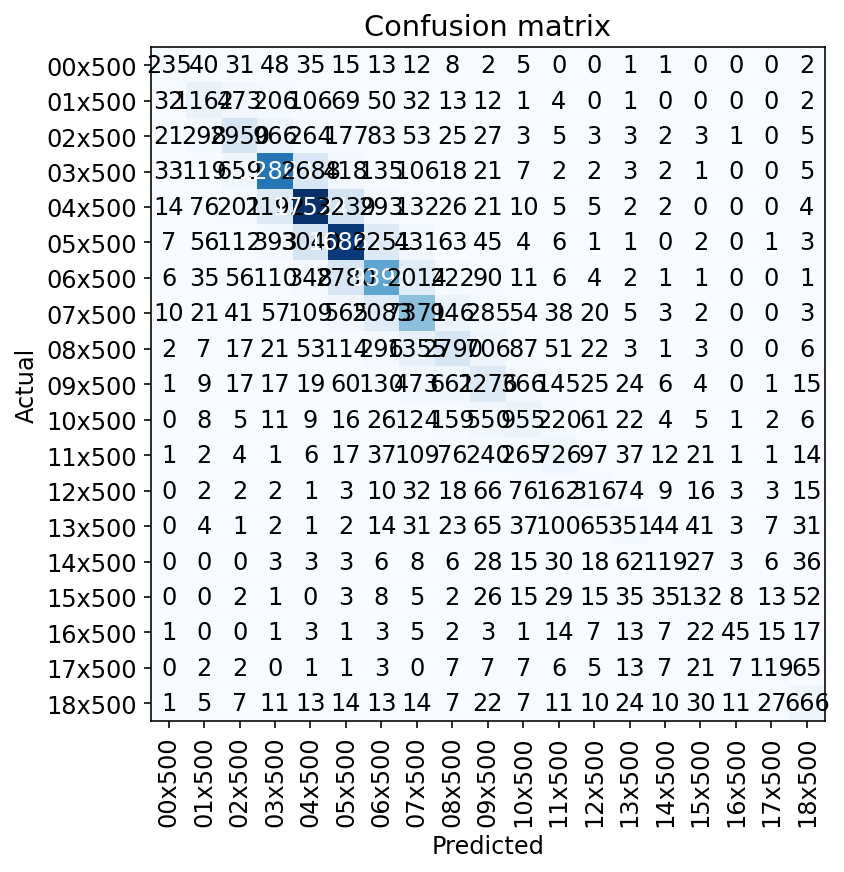

In [23]:
interp.plot_confusion_matrix()

In [24]:
interp.print_classification_report()

              precision    recall  f1-score   support

      00x500       0.65      0.52      0.58       448
      01x500       0.63      0.54      0.58      2163
      02x500       0.64      0.60      0.62      4889
      03x500       0.76      0.75      0.76     17082
      04x500       0.72      0.74      0.73     23746
      05x500       0.69      0.72      0.71     23277
      06x500       0.63      0.62      0.63     15080
      07x500       0.60      0.63      0.62     11613
      08x500       0.55      0.50      0.53      5534
      09x500       0.51      0.54      0.52      4249
      10x500       0.50      0.44      0.46      2184
      11x500       0.47      0.44      0.45      1667
      12x500       0.47      0.39      0.43       810
      13x500       0.52      0.43      0.47       822
      14x500       0.45      0.32      0.37       373
      15x500       0.40      0.35      0.37       381
      16x500       0.54      0.28      0.37       160
      17x500       0.61    

## try regression

In [25]:
dls = TabularDataLoaders.from_csv(path/'data.csv', 
                                  y_names="price",
                                  cat_names = ['housing', 
                                               'district', 
                                               'bedrooms', 
                                               'type', 
                                               'catsok', 
                                               'dogsok', 
                                               'garagea', 
                                               'garaged', 
                                               'furnished', 
                                               'laundryb', 
                                               'laundrys', 
                                               'wd',
                                               "nthumbs",
                                              ],
                                  cont_names = ['latitude', 'longitude', 'area'],
                                  procs = [Categorify, FillMissing, Normalize],
                                 bs=8192)

In [26]:
dls.show_batch()

,housing,district,bedrooms,type,catsok,dogsok,garagea,garaged,furnished,laundryb,laundrys,wd,nthumbs,latitude_na,longitude_na,area_na,latitude,longitude,area,price
0,3br,oakland west,#na#,duplex,False,False,False,False,False,False,False,False,15,False,False,True,37.807098,-122.285103,897.999997,2395.0
1,2br - 830ft2,fremont / union city / newark,2,apartment,True,True,False,False,False,False,False,True,24,False,False,False,37.553837,-121.985970,830.000005,2724.0
2,1br,potrero hill,#na#,apartment,False,False,False,False,False,False,False,False,5,False,False,True,37.750900,-122.415298,897.999997,2450.0
3,2br - 850ft2,danville / san ramon,2,apartment,True,True,False,False,False,False,True,False,5,False,False,False,37.824108,-121.997375,850.000005,2288.0
4,3br - 1275ft2,san carlos,3,apartment,False,False,False,False,False,False,False,True,15,False,False,False,37.492626,-122.276161,1275.000001,3995.0
5,1br - 520ft2,nob hill,1,apartment,True,True,False,False,True,False,False,True,12,False,False,False,37.790882,-122.410622,520.000012,3590.0
6,1br - 652ft2,mission district,1,apartment,True,True,False,False,False,False,False,True,23,False,False,False,37.766674,-122.419823,652.000010,3585.0
7,2br - 1315ft2,santa rosa,2,apartment,True,True,False,False,False,False,False,True,9,False,False,False,38.410690,-122.710243,1314.999986,2410.0
8,2br - 2200ft2,richmond / point / annex,2,condo,True,True,True,False,False,False,False,False,22,False,False,False,37.919041,-122.356125,2200.000061,3800.0
9,2br - 980ft2,"Rincon Hill, San Francisco",2,apartment,True,True,False,False,True,False,False,True,6,False,False,False,37.787994,-122.393600,980.000001,5790.0


In [27]:
def mean_abs_diff(inp, target):
    return (inp - target).abs().mean()
def min_abs_diff(inp, target):
    return (inp - target).abs().min()
def max_abs_diff(inp, target):
    return (inp - target).abs().max()

In [28]:
learn = tabular_learner(dls, y_range=(0,9500), 
                        layers=[500,250, 100], 
                        n_out=1, 
                        loss_func=F.mse_loss,
                        metrics=[mean_abs_diff, min_abs_diff, max_abs_diff]
                       )

SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=0.0004786300996784121)

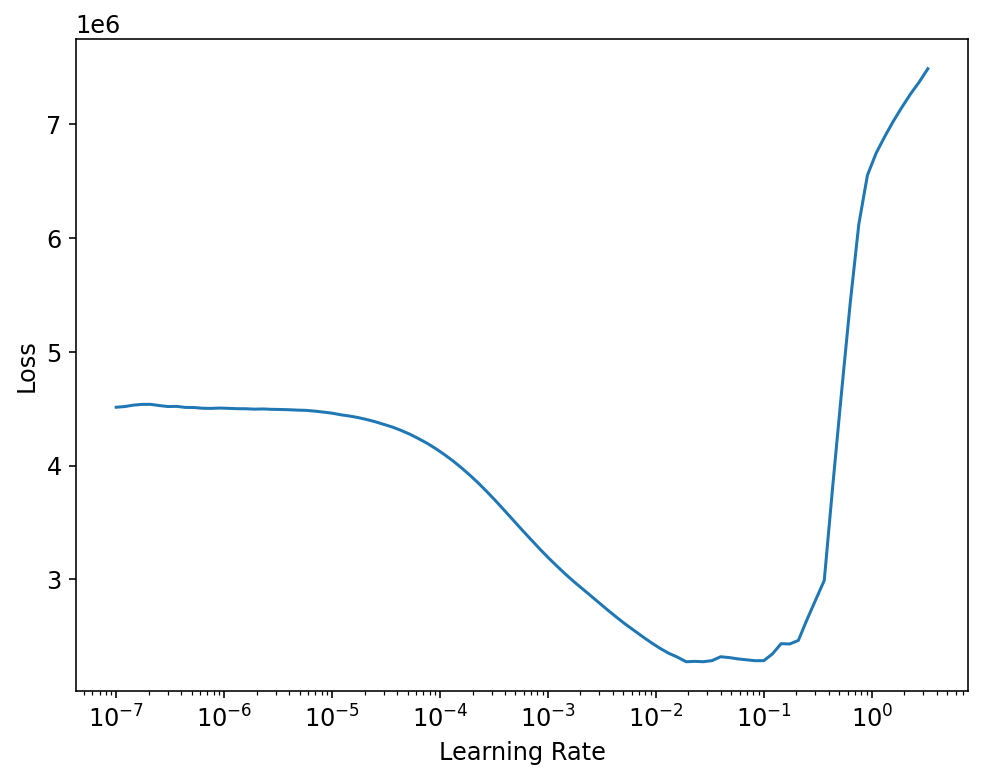

In [29]:
learn.lr_find()

In [30]:
learn.fit_one_cycle(35, 1e-02, wd=0.1)

epoch,train_loss,valid_loss,mean_abs_diff,min_abs_diff,max_abs_diff,time
0,633213.812500,1411602.375000,813.557861,0.127131,6547.619141,00:03
1,406342.187500,378320.062500,373.711487,0.067097,7506.902344,00:03
2,332558.406250,369597.468750,368.183411,0.082109,7715.976562,00:03
3,307078.437500,362038.531250,369.613464,0.040272,7618.785156,00:03
4,289920.125000,356369.718750,371.261444,0.067520,7662.918945,00:03
5,271559.375000,331823.750000,345.678101,0.061325,7588.303223,00:03
6,258134.890625,331380.968750,344.157227,0.081411,7697.358887,00:03
7,245440.390625,322001.781250,335.251617,0.051472,7686.075684,00:03
8,236366.609375,309275.531250,326.783905,0.062922,7590.352539,00:03
9,224303.343750,317532.343750,333.205322,0.029690,7741.219238,00:03


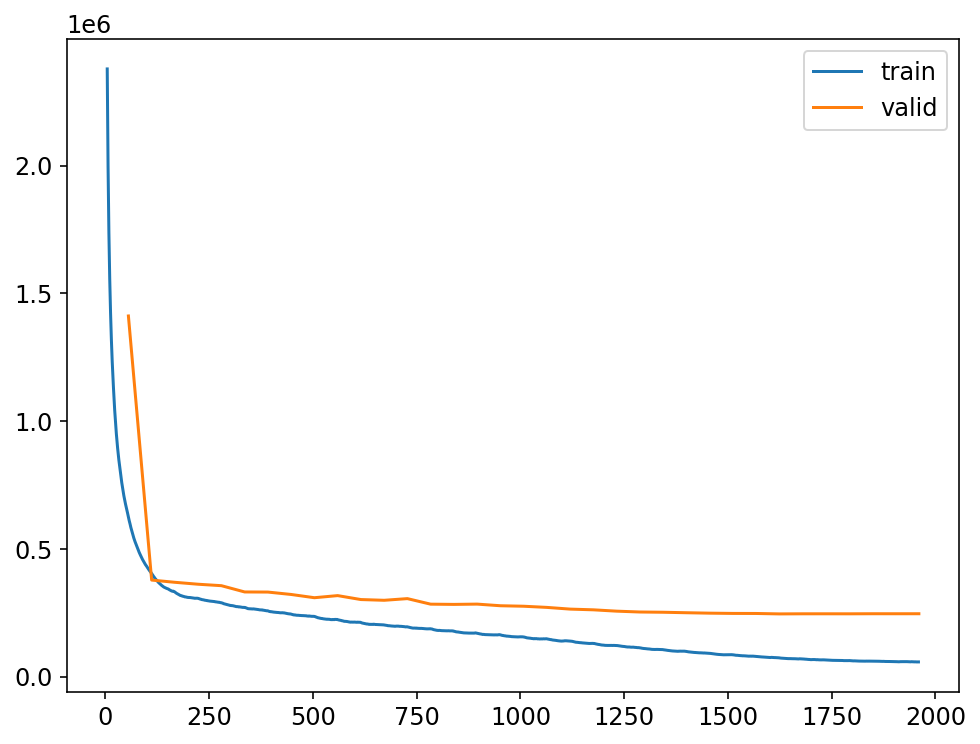

In [31]:
learn.recorder.plot_loss()

In [32]:
learn.export(fname="cltab.pkl")